# 초음파 광물 예측 데이터

- 1988년 존스홉킨스대학교의 세즈노프스키 교수가 1986년 힌튼 교수가 발표한 역전파 알고리즘에 관심을 갖고 은닉층과 역전파의 효과를 실험하기 위해 정리한 데이터
- 광석과 일반 돌에 각각 음파 탐지기를 쏜 후 그 결과를 정리

In [1]:
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno # 결측치 체크
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
df = pd.read_csv("./data/sonar.csv", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<Axes: >

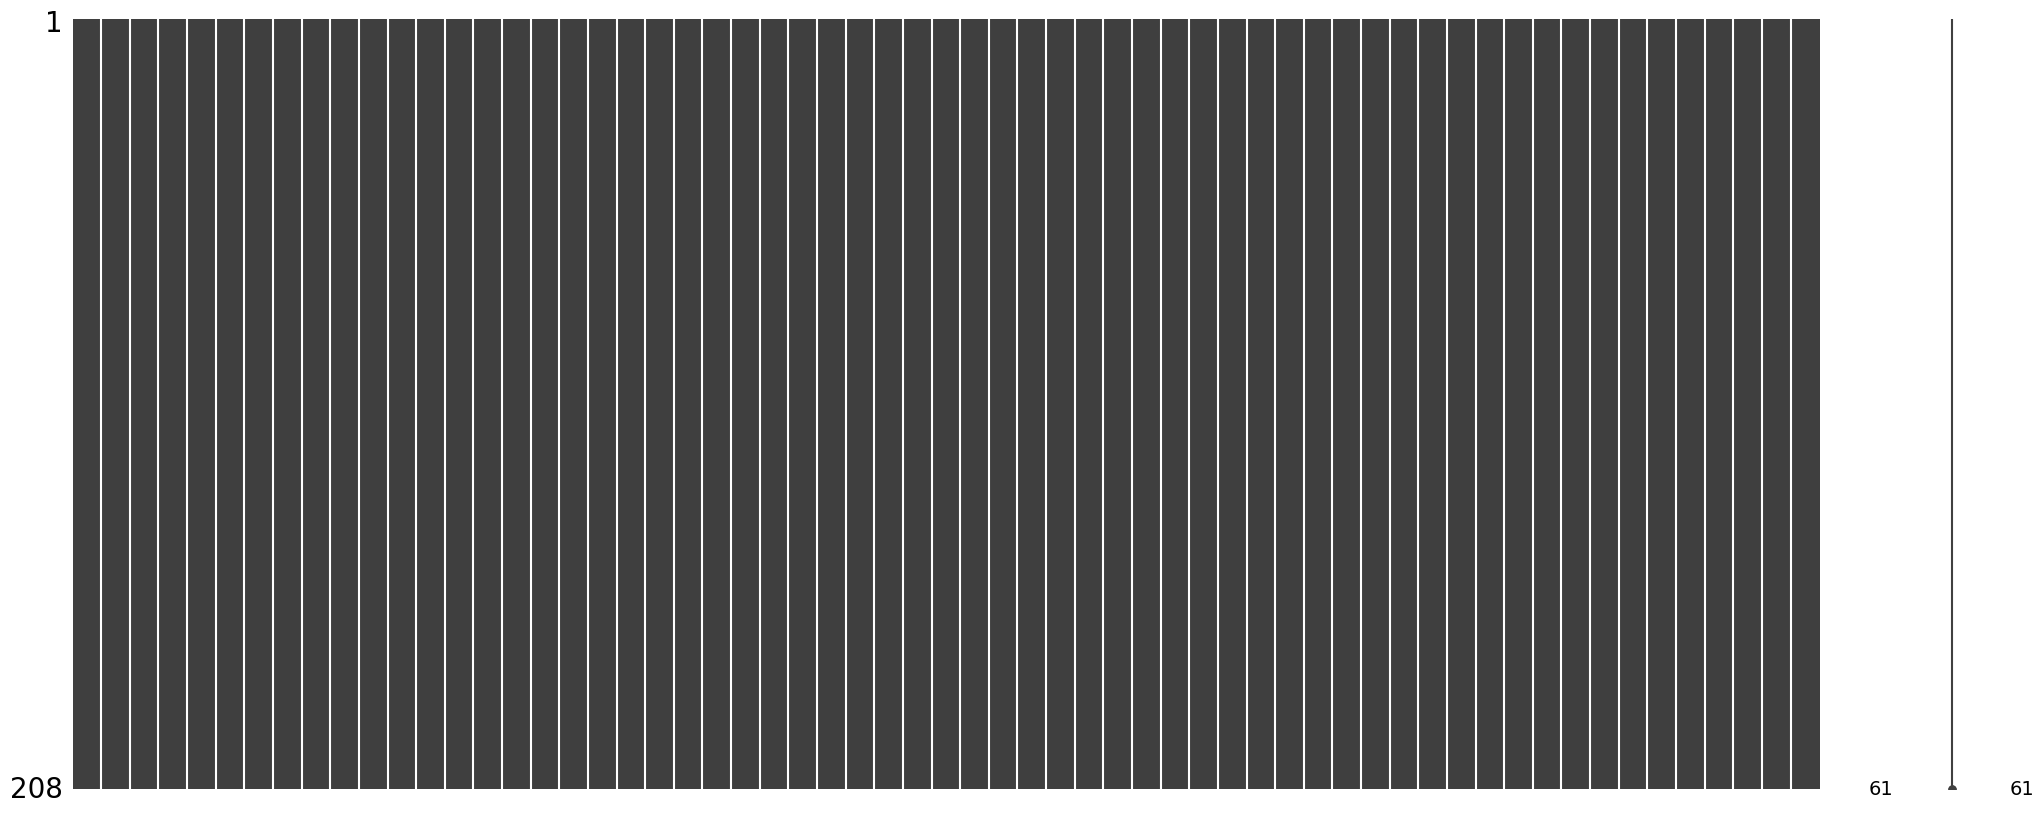

In [5]:
# 결측치 시각화
msno.matrix(df)

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


# case 1

- 출력층의 유닛 수 2개

In [7]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
encoded_y = pd.get_dummies(y)

In [9]:
encoded_y

,M,R
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
203,True,False
204,True,False
205,True,False
206,True,False


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, encoded_y, stratify = encoded_y, test_size = 0.2, random_state = 12)

In [11]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train, test_size = 0.2, random_state = 12)

In [12]:
# 스케일링
mm = MinMaxScaler()
scaled_sub = mm.fit_transform(x_sub)
scaled_val = mm.transform(x_val)
scaled_test = mm.transform(x_test)

In [13]:
x_sub.shape

(132, 60)

In [14]:
# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Dense(60, activation = "relu", input_shape = (60,)))
model.add(keras.layers.Dense(30, activation = "relu"))
model.add(keras.layers.Dense(2, activation = "softmax"))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 60)                  │           3,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,552 (21.69 KB)

 Trainable params: 5,552 (21.69 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [17]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [18]:
history = model.fit(scaled_sub, y_sub, epochs = 100, batch_size = 16, validation_data = (scaled_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5989 - loss: 0.6755 - val_accuracy: 0.7353 - val_loss: 0.6356
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6160 - loss: 0.6433 - val_accuracy: 0.7353 - val_loss: 0.6018
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6967 - loss: 0.5998 - val_accuracy: 0.7353 - val_loss: 0.5789
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7588 - loss: 0.5617 - val_accuracy: 0.7353 - val_loss: 0.5567
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7428 - loss: 0.5286 - val_accuracy: 0.7059 - val_loss: 0.5207
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8098 - loss: 0.4962 - val_accuracy: 0.7353 - val_loss: 0.4983
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8247 - loss: 0.4555 - val_accuracy: 0.7353 - val_loss: 0.4725
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7818 - loss: 0.4495 - val_accuracy: 0.7059 - val_loss: 0.464

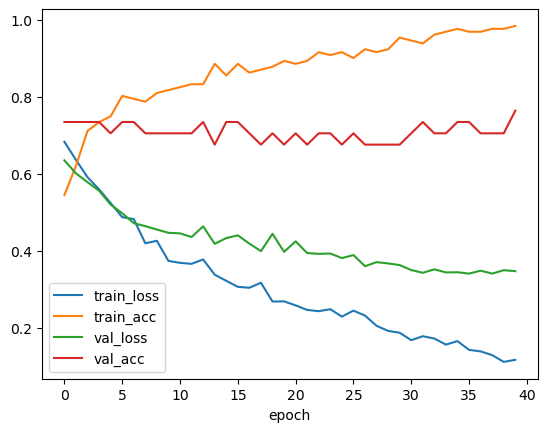

In [19]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

In [20]:
model.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7842 - loss: 0.4610 


[0.5041207671165466, 0.7857142686843872]

In [21]:
model.predict(scaled_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[0.6777189 , 0.32228112],
       [0.9767224 , 0.02327759],
       [0.32817802, 0.671822  ],
       [0.03589721, 0.96410275],
       [0.01164172, 0.9883583 ]], dtype=float32)

In [22]:
y_test[:5]

,M,R
22,False,True
203,True,False
106,True,False
75,False,True
13,False,True


# case 2

- 출력층의 유닛 수 1개

In [23]:
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 12)

In [26]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train, test_size = 0.2, random_state = 12)

In [27]:
# 스케일링
mm = MinMaxScaler()
scaled_sub = mm.fit_transform(x_sub)
scaled_val = mm.transform(x_val)
scaled_test = mm.transform(x_test)

In [29]:
# 모델 구성
model2 = keras.Sequential()
model2.add(keras.layers.Dense(60, activation = "relu", input_shape = (60,)))
model2.add(keras.layers.Dense(30, activation = "relu"))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

In [30]:
model2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [32]:
history = model2.fit(scaled_sub, y_sub, epochs = 100, batch_size = 16, validation_data = (scaled_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5660 - loss: 0.6880 - val_accuracy: 0.6765 - val_loss: 0.6625
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6741 - loss: 0.6454 - val_accuracy: 0.6176 - val_loss: 0.6558
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6578 - loss: 0.6354 - val_accuracy: 0.7353 - val_loss: 0.6413
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7245 - loss: 0.5986 - val_accuracy: 0.7353 - val_loss: 0.6305


In [33]:
model2.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5947 - loss: 0.6709


[0.6665122509002686, 0.5952380895614624]

In [35]:
model2.predict(scaled_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[0.43098998],
       [0.43452832],
       [0.41778237],
       [0.48109996],
       [0.40120456]], dtype=float32)

In [36]:
y_test[:5]

array([0, 1, 1, 0, 1])